In [1]:
%matplotlib inline
from threeML import *
import numpy as np
from matplotlib import pyplot as plt
import sys
import time


WARNING UserWarning: Using default configuration from /home/simonste/.venv/3ml/local/lib/python2.7/site-packages/threeML-0.4.946-py2.7.egg/threeML/data/threeML_config.yml. You might want to copy it to /home/simonste/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



# read data

In [2]:
pa = '/home/simonste/research/xrb/data/'
data_path = pa + 'input%s.txt'%'g'
gdata = XYLike.from_text_file("gdata", data_path)
gdata.assign_to_source(source_name = 'Xrb_gband_source')

data_path = pa +'input%s.txt'%'r'
rdata = XYLike.from_text_file("rdata", data_path)
rdata.assign_to_source(source_name = 'Xrb_rband_source')

data_path = pa +'input%s.txt'%'i'
idata = XYLike.from_text_file("idata", data_path)
idata.assign_to_source(source_name = 'Xrb_iband_source')

data_path = pa +'input%s.txt'%'z'
zdata = XYLike.from_text_file("zdata", data_path)
zdata.assign_to_source(source_name = 'Xrb_zband_source')

data_path = pa +'input%snew0102.txt'%'J'
Jdata = XYLike.from_text_file("Jdata", data_path)
Jdata.assign_to_source(source_name = 'Xrb_Jband_source')

data_path = pa +'input%snew0102.txt'%'H'
Hdata = XYLike.from_text_file("Hdata", data_path)
Hdata.assign_to_source(source_name = 'Xrb_Hband_source')

data_path = pa +'input%snew0102.txt'%'K'
Kdata = XYLike.from_text_file("Kdata", data_path)
Kdata.assign_to_source(source_name = 'Xrb_Kband_source')

data = DataList(gdata,rdata,idata,zdata,Jdata,Hdata,Kdata)

Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.



WARNING FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls



In [3]:
# point sources and model



# Create model and link it

def ModeltoPointSource(band):
    mod = TemplateModel('Xrb_HSESRinner%s'%band,log_interp = False)
    mod.K.fix = True
    mod.scale.fix =True
    
    return PointSource('Xrb_%s_source'%band, 0, 0, spectral_shape = mod)

#modtest = TemplateModel('Xrb_HSES_gband',log_interp = False)
#modnewtest = modtest= + 0.2
##print modtest,modnewtest

filter_list = ['gband','rband','iband','zband','Jband','Hband','Kband']
point_source_list = ['ps_g','ps_r','ps_i','ps_z','ps_J','ps_H','ps_K']
PointSdict = {}
for h in range(len(filter_list)):
    PointSdict[point_source_list[h]] = ModeltoPointSource(filter_list[h])

my_model = Model(PointSdict['ps_g'],PointSdict['ps_r']
                 ,PointSdict['ps_i'],PointSdict['ps_z']
                 ,PointSdict['ps_J'],PointSdict['ps_H'],PointSdict['ps_K'])


In [4]:
my_model.display();


WARNING FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



Model summary:
==============

                  N
Point sources     7
Extended sources  0
Particle sources  0

Free parameters (56):
--------------------

                            value min_value max_value unit
Xrb_gband_source...Inkl        69        60        78     
Xrb_gband_source...Dtemp     2050      1000      3100     
Xrb_gband_source...HSTemp    5100      3100      7100     
Xrb_gband_source...HSWidth     21         1        41     
Xrb_gband_source...T_sec     4200      3800      4600     
Xrb_gband_source...distfac      0        -1         1     
Xrb_gband_source...Dsize    0.875     0.725     0.999     
Xrb_gband_source...R_inner   5000      1000      9000     
Xrb_rband_source...Inkl        69        60        78     
Xrb_rband_source...Dtemp     2050      1000      3100     
Xrb_rband_source...HSTemp    5100      3100      7100     
Xrb_rband_source...HSWidth     21         1        41     
Xrb_rband_source...T_sec     4200      3800      4600     
Xrb_rband_source...distfac      0        -1         1     
Xrb_rband_source...Dsize    0.875     0.725     0.999     
Xrb_rband_source...R_inner   5000      1000      9000     
Xrb_iband_source...Inkl        69        60        78     
Xrb_iband_source...Dtemp     2050      1000      3100     
Xrb_iband_source...HSTemp    5100      3100      7100     
Xrb_iband_source...HSWidth     21         1        41     
Xrb_iband_source...T_sec     4200      3800      4600     
Xrb_iband_source...distfac      0        -1         1     
Xrb_iband_source...Dsize    0.875     0.725     0.999     
Xrb_iband_source...R_inner   5000      1000      9000     
Xrb_zband_source...Inkl        69        60        78     
Xrb_zband_source...Dtemp     2050      1000      3100     
Xrb_zband_source...HSTemp    5100      3100      7100     
Xrb_zband_source...HSWidth     21         1        41     
Xrb_zband_source...T_sec     4200      3800      4600     
Xrb_zband_source...distfac      0        -1         1     
Xrb_zband_source...Dsize    0.875     0.725     0.999     
Xrb_zband_source...R_inner   5000      1000      9000     
Xrb_Jband_source...Inkl        69        60        78     
Xrb_Jband_source...Dtemp     2050      1000      3100     
Xrb_Jband_source...HSTemp    5100      3100      7100     
Xrb_Jband_source...HSWidth     21         1        41     
Xrb_Jband_source...T_sec     4200      3800      4600     
Xrb_Jband_source...distfac      0        -1         1     
Xrb_Jband_source...Dsize    0.875     0.725     0.999     
Xrb_Jband_source...R_inner   5000      1000      9000     
Xrb_Hband_source...Inkl        69        60        78     
Xrb_Hband_source...Dtemp     2050      1000      3100     
Xrb_Hband_source...HSTemp    5100      3100      7100     
Xrb_Hband_source...HSWidth     21         1        41     
Xrb_Hband_source...T_sec     4200      3800      4600     
Xrb_Hband_source...distfac      0        -1         1     
Xrb_Hband_source...Dsize    0.875     0.725     0.999     
Xrb_Hband_source...R_inner   5000      1000      9000     
Xrb_Kband_source...Inkl        69        60        78     
Xrb_Kband_source...Dtemp     2050      1000      3100     
Xrb_Kband_source...HSTemp    5100      3100      7100     
Xrb_Kband_source...HSWidth     21         1        41     
Xrb_Kband_source...T_sec     4200      3800      4600     
Xrb_Kband_source...distfac      0        -1         1     
Xrb_Kband_source...Dsize    0.875     0.725     0.999     
Xrb_Kband_source...R_inner   5000      1000      9000     

Fixed parameters (28):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

In [5]:
allInklParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSESRinnerrband.Inkl,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESRinneriband.Inkl,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESRinnerzband.Inkl,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESRinnerJband.Inkl,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESRinnerHband.Inkl,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESRinnerKband.Inkl]
allDtempParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSESRinnerrband.Dtemp,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESRinneriband.Dtemp,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESRinnerzband.Dtemp,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESRinnerJband.Dtemp,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESRinnerHband.Dtemp,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESRinnerKband.Dtemp]
allHSTempParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSESRinnerrband.HSTemp,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESRinneriband.HSTemp,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESRinnerzband.HSTemp,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESRinnerJband.HSTemp,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESRinnerHband.HSTemp,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESRinnerKband.HSTemp]
allHSwidthParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSESRinnerrband.HSWidth,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESRinneriband.HSWidth,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESRinnerzband.HSWidth,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESRinnerJband.HSWidth,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESRinnerHband.HSWidth,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESRinnerKband.HSWidth]
allT_secParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSESRinnerrband.T_sec,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESRinneriband.T_sec,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESRinnerzband.T_sec,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESRinnerJband.T_sec,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESRinnerHband.T_sec,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESRinnerKband.T_sec]
alldistfacParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSESRinnerrband.distfac,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESRinneriband.distfac,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESRinnerzband.distfac,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESRinnerJband.distfac,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESRinnerHband.distfac,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESRinnerKband.distfac]
allDsizeParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSESRinnerrband.Dsize,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESRinneriband.Dsize,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESRinnerzband.Dsize,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESRinnerJband.Dsize,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESRinnerHband.Dsize,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESRinnerKband.Dsize]
allR_innerParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSESRinnerrband.R_inner,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESRinneriband.R_inner,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESRinnerzband.R_inner,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESRinnerJband.R_inner,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESRinnerHband.R_inner,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESRinnerKband.R_inner]

In [6]:
my_model.link(allInklParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Inkl)
my_model.link(allDtempParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Dtemp)
my_model.link(allHSTempParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.HSTemp)
my_model.link(allHSwidthParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.HSWidth)
my_model.link(allT_secParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.T_sec)
my_model.link(alldistfacParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.distfac)
my_model.link(allDsizeParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Dsize)
my_model.link(allR_innerParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.R_inner)

In [7]:
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Inkl.prior = Truncated_gaussian(mu = 70, sigma = 3, lower_bound = 60, upper_bound=78)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Dtemp.prior = Truncated_gaussian(mu = 1300, sigma = 500, lower_bound = 1000, upper_bound=3100)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.HSTemp.prior = Truncated_gaussian(mu = 4100 , sigma = 1000, lower_bound = 3100, upper_bound=7100)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.HSWidth.prior = Truncated_gaussian(mu = 11, sigma = 6 ,lower_bound = 1, upper_bound=41)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.T_sec.prior = Truncated_gaussian(mu = 4105, sigma = 40,lower_bound = 3800, upper_bound=4600)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.distfac.prior = Truncated_gaussian(mu = -0.005, sigma = 0.007, lower_bound = -1., upper_bound=1.)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Dsize.prior = Truncated_gaussian(mu = 0.81,sigma = 0.15,lower_bound = 0.725, upper_bound=0.999)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.R_inner.prior = Truncated_gaussian(mu = 7000,sigma = 1000,lower_bound = 1000,upper_bound= 9000)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.distfac = - 0.005

In [8]:
bs = BayesianAnalysis(my_model, data)
samples = bs.sample(n_walkers=100, burn_in=200, n_samples=400)
bs.results.write_to('HSESRinner12_04.fits',overwrite=True)


Mean acceptance fraction: 0.33772499999999994

model cloned
Maximum a posteriori probability (MAP) point:




WARNING FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



,result,unit
parameter,,
Xrb_gband_source...Inkl,(7.240 +/- 0.11) x 10,
Xrb_gband_source...Dtemp,(1.51 -0.11 +0.10) x 10^3,
Xrb_gband_source...HSTemp,(6.1 -1.4 +0.8) x 10^3,
Xrb_gband_source...HSWidth,2.9 -1.6 +2.1,
Xrb_gband_source...T_sec,(4.082 +/- 0.010) x 10^3,
Xrb_gband_source...distfac,(-8.800 +/- 2.4) x 10^-3,
Xrb_gband_source...Dsize,(7.900 +/- 0.4) x 10^-1,
Xrb_gband_source...R_inner,(4.24 -0.4 +0.32) x 10^3,



Values of -log(posterior) at the minimum:



,-log(posterior)
Hdata,-43.474772
Jdata,-167.021560
Kdata,-35.627704
gdata,-70.349959
idata,-102996.655963
rdata,-56771.110164
total,-298072.699810
zdata,-137988.459687



Values of statistical measures:



,statistical measures
AIC,596162.002130
BIC,596189.507050
DIC,-584201.092022
PDIC,-585094.656254


model cloned


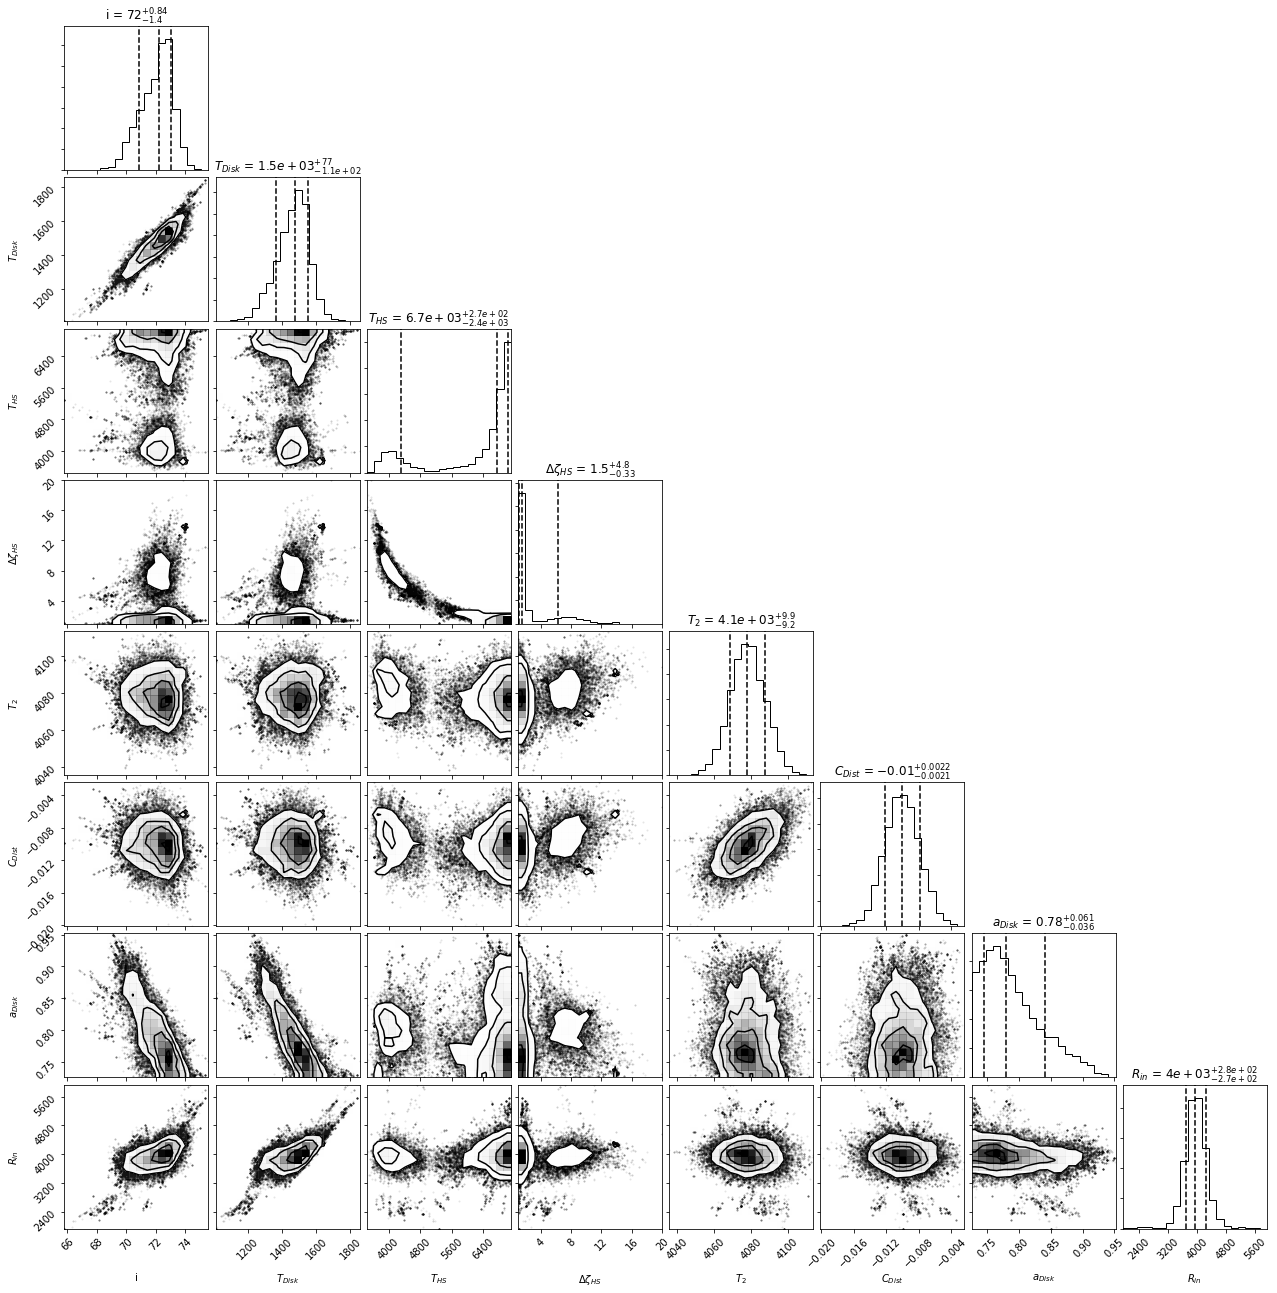

In [11]:
bs.corner_plot(renamed_parameters={'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Inkl':'i',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Dtemp':r'$T_{Disk}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.HSTemp':r'$T_{HS}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.HSWidth':r'$\Delta \zeta_{HS}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.T_sec':r'$T_{2}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.distfac':r'$C_{Dist}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Dsize':r'$a_{Disk}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.R_inner':r'$R_{in}$'},title_size = 29);

equal-tail: (1.26 -0.16 +0.17) x 10, hpd: (1.26 -0.17 +0.16) x 10
11.616772518252034


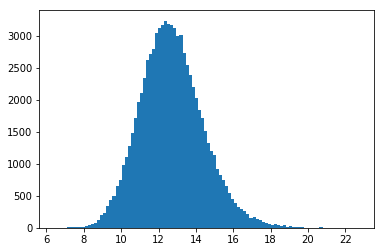

In [35]:
def sinthird(i,T,K):
    irad = i/180.*np.pi
    return np.sin(irad)**3*T/K

this_i = bs.get_variates('Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Inkl')
this_T = bs.get_variates('Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Dtemp')
Ksel = np.random.normal(100,10,80000)
f = sinthird(this_i,this_T,Ksel)
print f
plt.hist(f.samples,bins = 100)
print sinthird(70.,1400,100)

In [21]:
70.0/180*np.pi

1.2217304763960306

In [2]:
bs = load_analysis_results("HSESRinner06_03.fits")

model cloned


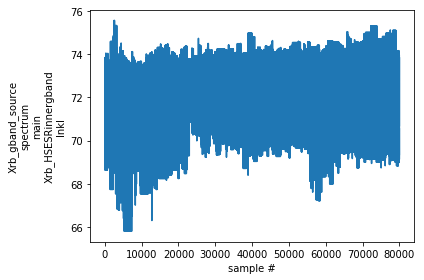

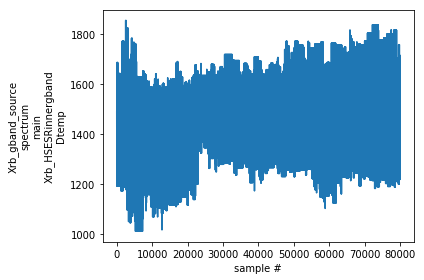

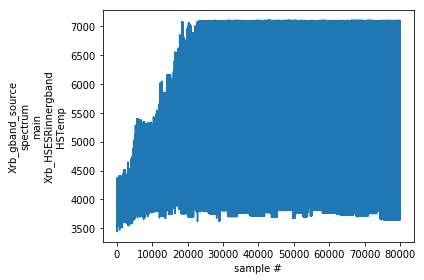

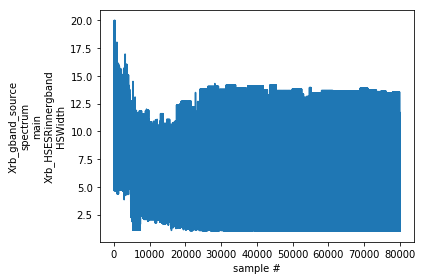

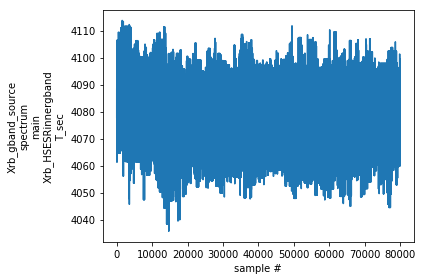

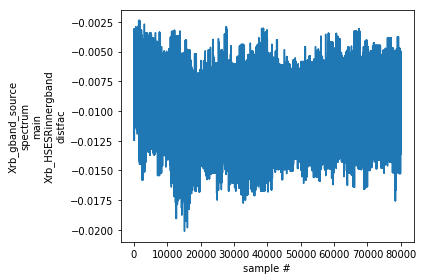

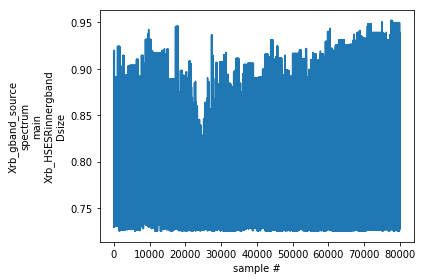

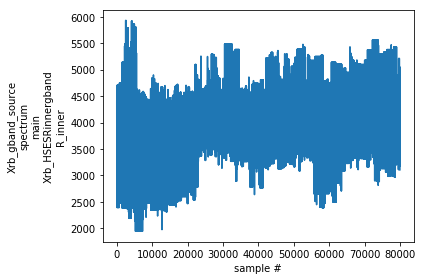

In [10]:
figlist = bs.plot_chains();

In [11]:
fig = figlist[-1]
fig.axes[0].set_ylabel(r"$R_{inner}$")
fig.show()
fig.savefig("Plots/chainsemceeRinner.png")


WARNING UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure



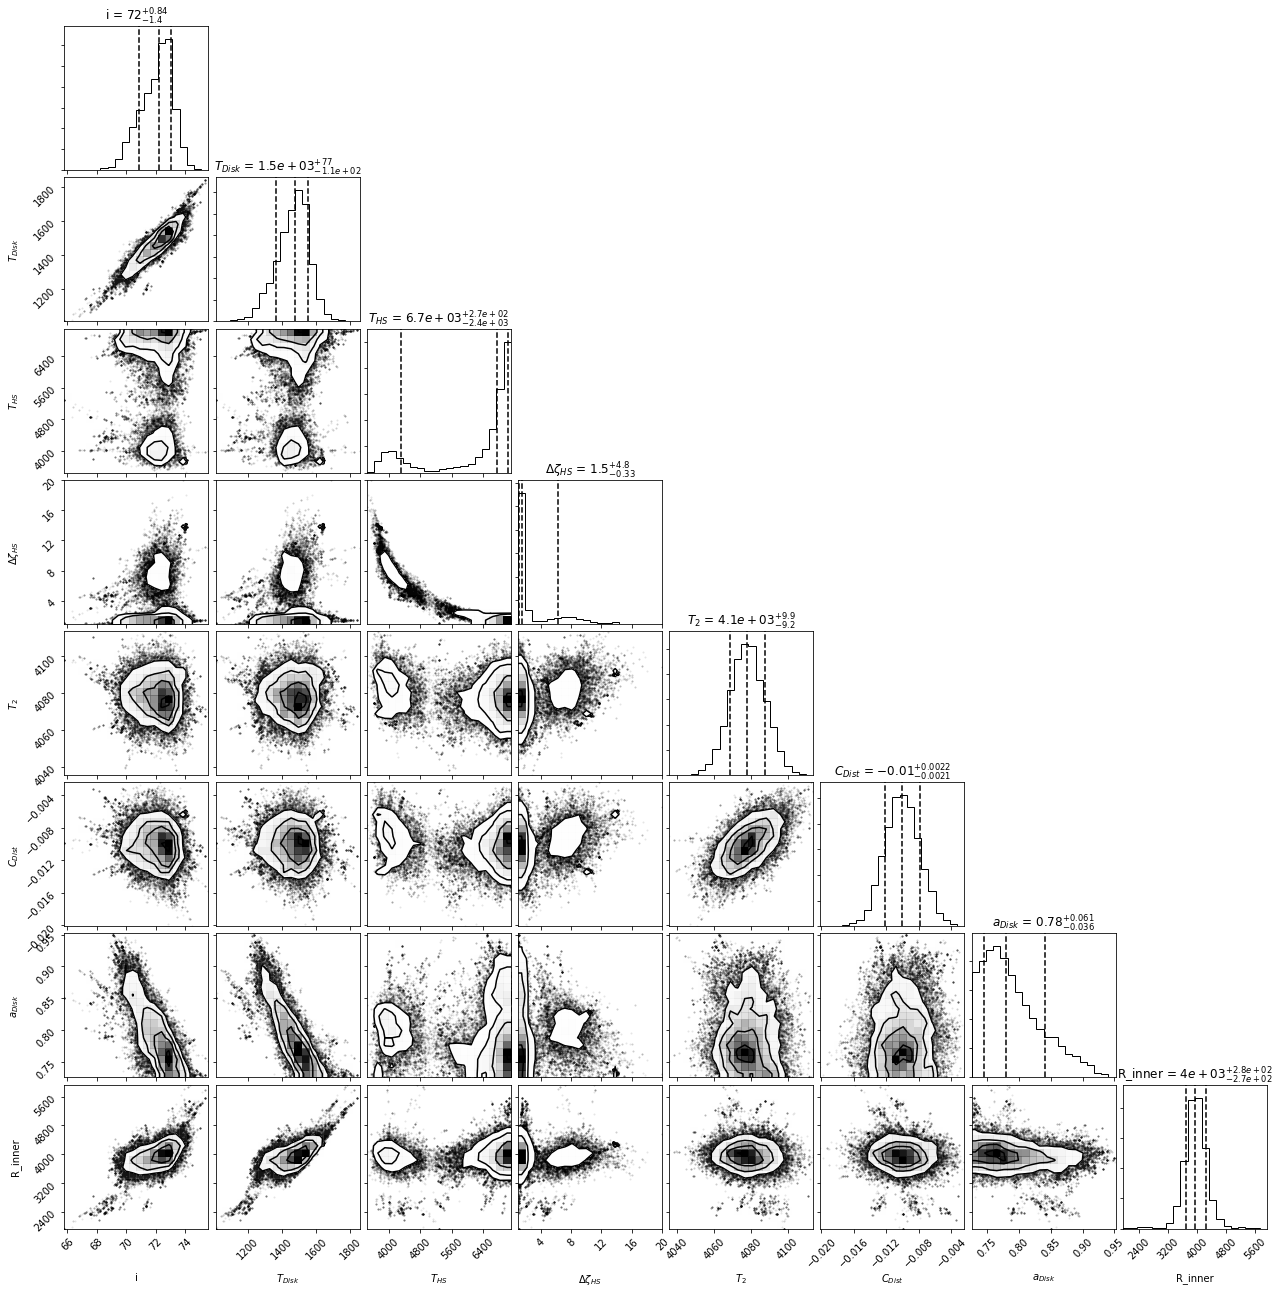

In [12]:
bs.corner_plot(renamed_parameters={'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Inkl':'i',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Dtemp':r'$T_{Disk}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.HSTemp':r'$T_{HS}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.HSWidth':r'$\Delta \zeta_{HS}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.T_sec':r'$T_{2}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.distfac':r'$C_{Dist}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Dsize':r'$a_{Disk}$',
                                  'Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Rinner':r'$R_{in}$'},title_size = 29);
plt.savefig("Plots/Rinnerresultcp.pdf")

In [8]:
def  compplot2(my_model,params,ax,i):
    
    bands_data = [gdata,rdata,idata,zdata,Jdata,Hdata,Kdata]
    #bands_data = [zdata]
    lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
    #my_model.Xrb_gsource.spectrum.main.Xrb_template_gband.Mass.value = params[0]
    for it,(name,par) in enumerate(my_model.free_parameters.iteritems()):
        par.value = params[it]
    #my_model.Xrb_gband_source.spectrum.main.Xrb_HS_gband.Dsize.value = params[2]
    
    
    
    #modlist = [modelg,modelr,modeli,modelz,modelJ,modelH,modelK]
    for co,(source_name, point_source) in enumerate(my_model.point_sources.iteritems()):
        
        ax.plot(phases,point_source.spectrum.main.shape(phases),
                '-',c = lColor[co],alpha=0.1,lw=.5 )#,label= "%s" %(point_source))
        
                
        
        

    co = 0
    if i == 0:
        for band in bands_data:
            ax.errorbar(band.x,band.y,yerr = band.yerr, fmt ='.', label = 'GROND '  + band.get_name()[0],c = lColor[co])
            co+=1

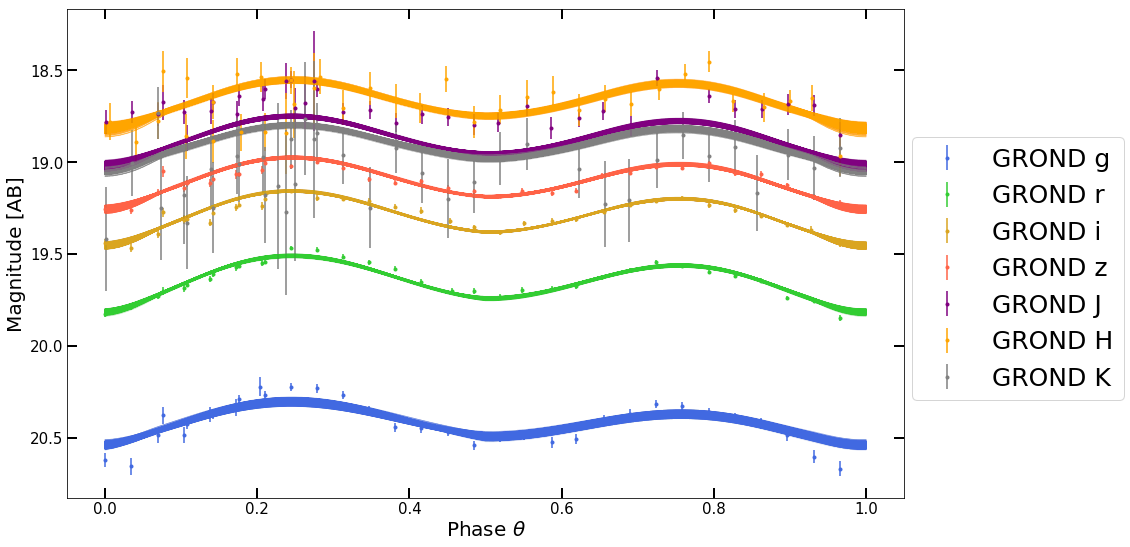

In [9]:
phases = np.arange(0,1.01,0.01)
#mysinglemodel = load_analysis_results('../XrbHSESDsizeinclonlyK3Multinest.fits')
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(bs.samples.T[::10]): 

            #print parameterset
        compplot2(my_model,parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$",fontsize =20)
lgd=ax.legend(fontsize =25,loc = (1.01,0.2))
ax.set_ylabel("Magnitude [AB]",fontsize =20)
ax.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
plt.gca().invert_yaxis()
fig.savefig('Plots/RinneremceeLC.pdf',bbox_extra_artists=(lgd,),bbox_inches = 'tight')
#timestop = time.time()
#print (timestop-timestart)